In [ ]:
!python -m spacy download en

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import sent_tokenize, word_tokenize
import string
import spacy
nlp = spacy.load("en_core_web_sm")

In [154]:
lang_df = pd.read_csv('sent_translations.csv')

## Sentence Alignment

In [155]:
lang_df.drop('Unnamed: 0', 1, inplace=True)

# these columns were not correctly aligned
lang_df.drop([5, 96, 98, 100, 103, 106, 109, 112, 259, 260,261,262, 263, 264, 266, 272, 273, 274, 275, 276, 367, 
              375,410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,422, 434, 435, 436, 281, 282,283, 284, 285, 286,
             287,288, 289, 290, 291, 292,293,294, 295, 296, 297,298,299,300, 301, 302, 397, 398,399,400, 
              401, 402, 403, 404, 405,406,407,408], inplace=True)

In [157]:
#lang_df['Spanish'] = lang_df['Spanish'].shift(-1)
lang_df.drop_duplicates(inplace=True)

In [165]:
len(lang_df)

408

In [216]:
lang_df.head()

,Spanish,English
0,La violencia en sus diversas variantes está pr...,Violence in its several variations is present ...
1,Este fenómeno impacta a un alto por ciento de ...,This phenomenon impacts a high percentage of c...
2,La globalización y la continua búsqueda de las...,Globalization and the continued quest of natio...
3,"Asimismo, son estas nuevas tecnologías las que...",It is also these new technologies that can fos...
4,La educación está en constante transmutación c...,Education is constantly changing because of th...


In [217]:
lang_df.reset_index(drop=True,inplace=True)

## Example Sentence

In [218]:
lang_df['English'][322]

'Moreover, the storylines problematize the relationship between femininity and power as well as the relationship between the personal and political.'

In [219]:
lang_df['Spanish'][322]

'Además, las historias argumentan la relación entre la feminidad y el poder y la relación entre lo personal y lo político.'

## Explatory Data Analysis

In [220]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword_en = stopwords.words('english')
stopword_sp = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carmen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [239]:
def text_stats(doc,stopword):
    """
    Pass in a single document
    as a string
    """
    #sents = sent_tokenize(doc)
    #num_sents = len(sents)
    tokens = word_tokenize(doc)
    num_tokens = len(tokens)
    words = [token.lower() for token in tokens 
             if not token in string.punctuation
             if not token.lower() in stopword]
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    spacy_doc = nlp(doc)
    numerics = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY','ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in numerics]
    num_entities = len(set(entities))
    #words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    stats = [num_tokens, num_words, vocab, num_entities, char_word, lex_div]
    return stats

In [240]:
docs_stats = []
for doc in lang_df['English']:
    docs_stats.append(text_stats(doc, stopword_en))

In [241]:
textstats_en = pd.DataFrame(docs_stats, columns=['Tokens', 'Words', 'Vocabulary', 'Entities', 'Avg Word Length', 'Lexical Diversity'])
textstats_en.head()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
0,13,6,6,1,7.333333,1.0000
1,30,16,15,1,7.500000,0.9375
2,26,15,15,1,8.666667,1.0000
3,23,11,11,0,7.909091,1.0000
4,21,10,10,1,7.900000,1.0000


In [242]:
textstats_en.describe()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,33.311275,17.639706,16.644608,1.343137,7.565119,0.964445
std,21.433485,11.109245,9.264005,1.604631,1.060660,0.066591
min,2.000000,1.000000,1.000000,0.000000,3.583333,0.425532
25%,21.000000,11.000000,11.000000,0.000000,6.919167,0.944444
50%,28.000000,15.000000,14.500000,1.000000,7.545455,1.000000
75%,38.000000,21.000000,20.000000,2.000000,8.166667,1.000000
max,193.000000,94.000000,68.000000,10.000000,13.000000,1.000000


In [243]:
nlp = spacy.load("es_core_news_sm")

In [244]:
docs_stats = []
for doc in lang_df['Spanish']:
    docs_stats.append(text_stats(doc, stopword_sp))

In [245]:
textstats_sp = pd.DataFrame(docs_stats, columns=['Tokens', 'Words', 'Vocabulary', 'Entities', 'Avg Word Length', 'Lexical Diversity'])
textstats_sp.head()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
0,16,6,6,0,8.166667,1.0
1,41,16,16,0,7.562500,1.0
2,30,16,16,0,9.437500,1.0
3,28,13,13,0,8.615385,1.0
4,23,11,11,0,9.272727,1.0


In [246]:
textstats_sp.describe()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,36.438725,18.318627,17.436275,1.046569,8.095153,0.969488
std,21.936051,10.924195,9.296421,1.760971,1.050413,0.059056
min,3.000000,1.000000,1.000000,0.000000,4.000000,0.500000
25%,24.000000,12.000000,12.000000,0.000000,7.492647,0.947368
50%,31.000000,15.000000,15.000000,0.000000,8.129167,1.000000
75%,41.000000,21.000000,20.000000,1.000000,8.752976,1.000000
max,183.000000,88.000000,74.000000,13.000000,13.000000,1.000000


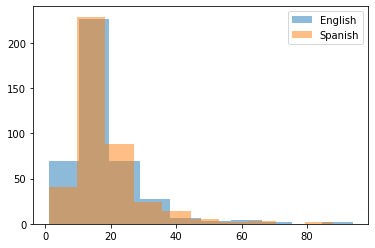

In [313]:
plt.hist(textstats_en['Words'], alpha = .5, label = "English")
plt.hist(textstats_sp['Words'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

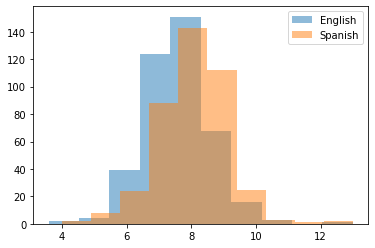

In [312]:
plt.hist(textstats_en['Avg Word Length'], alpha = .5, label = "English")
plt.hist(textstats_sp['Avg Word Length'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

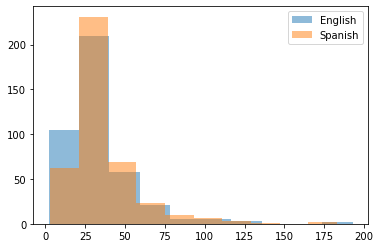

In [311]:
plt.hist(textstats_en['Tokens'], alpha = .5, label = "English")
plt.hist(textstats_sp['Tokens'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

In [351]:
def plot_wordcloud(stopwords, text,mask=None,max_words=500,max_font_size=100,figure_size=(24.0,16.0),title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'pr', 'th', 'sayi', 'fo', 'Unknown', 'las', 'la', 'va', 'ha', 'en', 
                          'un', 'han', 'c', 'estas', 'estos', 'dtype', 'se', 'por', 'para', 'de', 'este', 'está','t', 'y'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    colormap = 'Reds',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                              'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

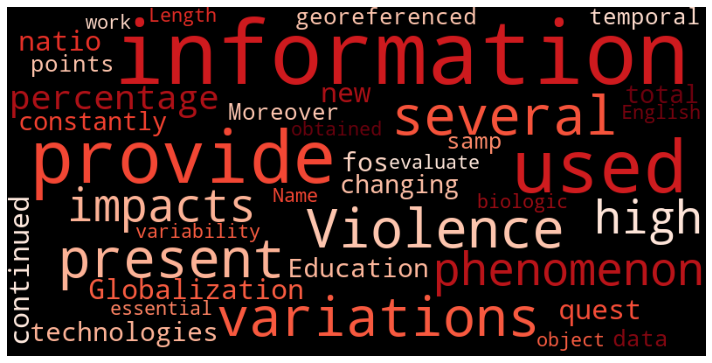

In [352]:
plot_wordcloud(stopword_en, lang_df['English'], figure_size=(10,10))

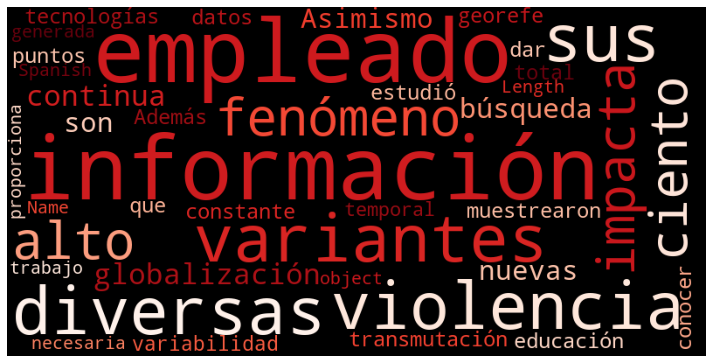

In [353]:
plot_wordcloud(stopword_sp, lang_df['Spanish'], figure_size=(10,10))